## **Random Forest Assignment: Glass Classification Model**



**Objective**:

By working through this assignment, I intend to learn how to use Random Forest on the Glass dataset after exploring its structure and getting it ready for the model. Following the steps one by one will deepen my knowledge of data exploration and the way it contributes to the creation of successful classification models.

**Dataset**:

The Glass dataset is utilized for this analysis, which classifies glass types based on chemical composition. Key fields include:

A) RI: Refractive index.

B) Na: Sodium content (weight percent).

C) Mg: Magnesium content.

D) Al: Aluminum content.

E) Si: Silicon content.

F) K: Potassium content.

G) Ca: Calcium content.

H) Ba: Barium content.

I ) Fe: Iron content.

J) Type: Glass type (1 = building_windows_float_processed, 2 = building_windows_non_float_processed, 3 = vehicle_windows_float_processed, 4 = vehicle_windows_non_float_processed, 5 = containers, 6 = tableware, 7 = headlamps).



**Details**: With 214 records, the dataset offers a targeted chance to investigate multi-class classification using random forest modeling.

**1. Exploratory Data Analysis (EDA)**

I used exploratory data analysis to understand the structure of the dataset, find problems, and get preliminary insights.

You should perform exploratory data analysis by examining distributions, data types, and summary statistics in order to understand the features of the dataset.

 Check the data for inconsistencies, outliers, and missing values: searched for outliers and missing data that could have an impact on the modeling.

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_excel('glass.xlsx', sheet_name='glass')

# Basic exploration
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())
print("Summary Statistics:\n", data.describe())
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)

Dataset Shape: (214, 10)
First 5 Rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Summary Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.7900

The 10 columns and 214 entries of the dataset are all numeric and do not have any missing values, which makes preprocessing very straightforward. The summary statistics reveal that Mg ranges between 0 and 4.49, thus showing that there is some variation in the different types of glass. On the other hand, RI has an average of 1.518 with a very small standard deviation (0.003). The variable type covers the range from 1 to 7 with a mean of 2.78 and a maximum of 7, which shows that the number of classes is most likely not evenly distributed and that this issue might require some further investigation. A clear numeric foundation is provided by the data types int64 for type and float64 for chemical compositions. Although there aren't any obvious discrepancies right away, Ba (max 3.15) and Fe (max 0.51) are potential outliers. The next visualization step is made possible by this strong structure.

**2. Data Visualization**

I made visualizations to investigate feature relationships and distributions, exposing classification patterns.  



Visualizations: Distributions were shown using box plots and histograms, and feature correlations were investigated using a correlation matrix.  

Analysis of patterns or correlations: examined the relationship between features and type.

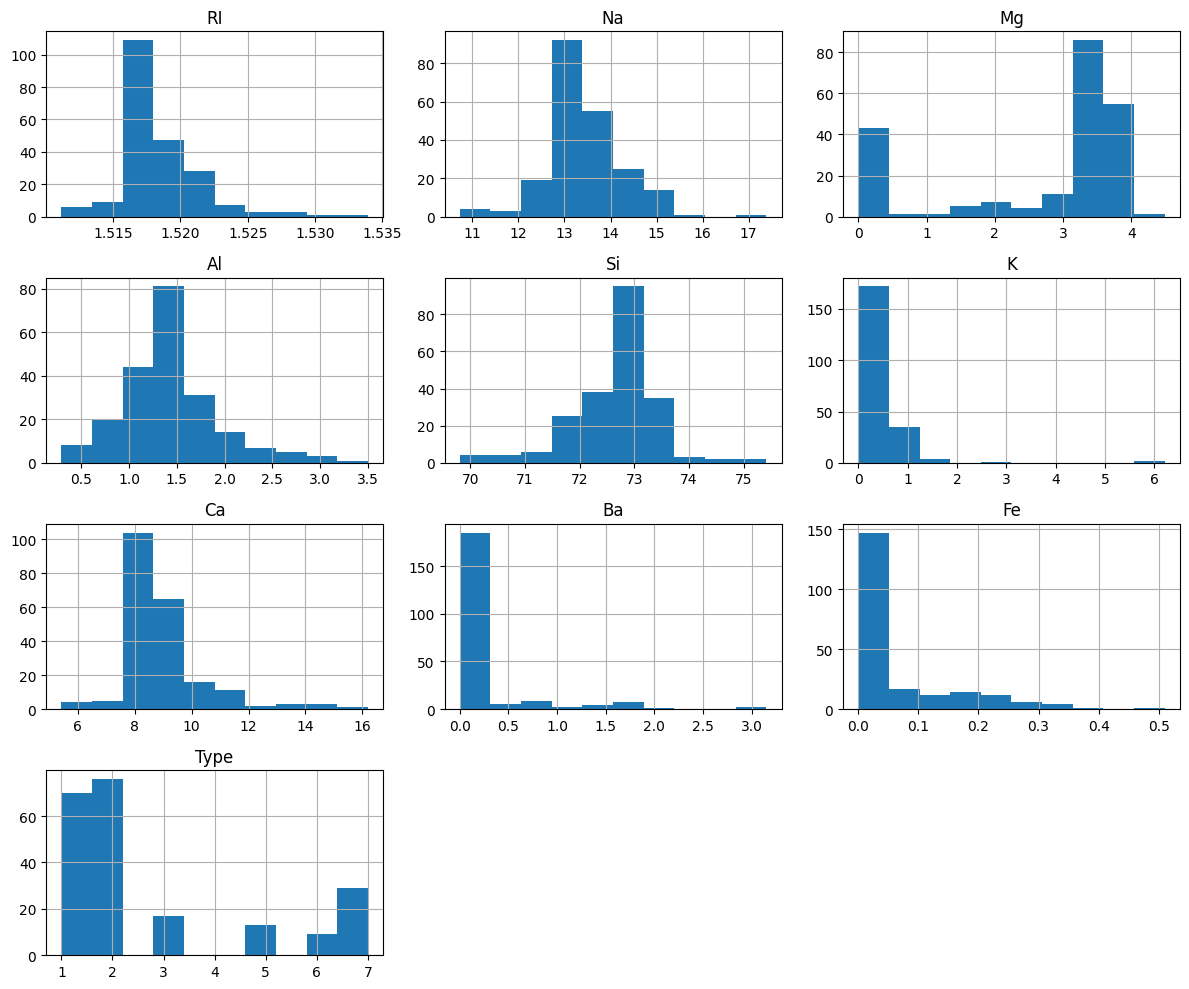

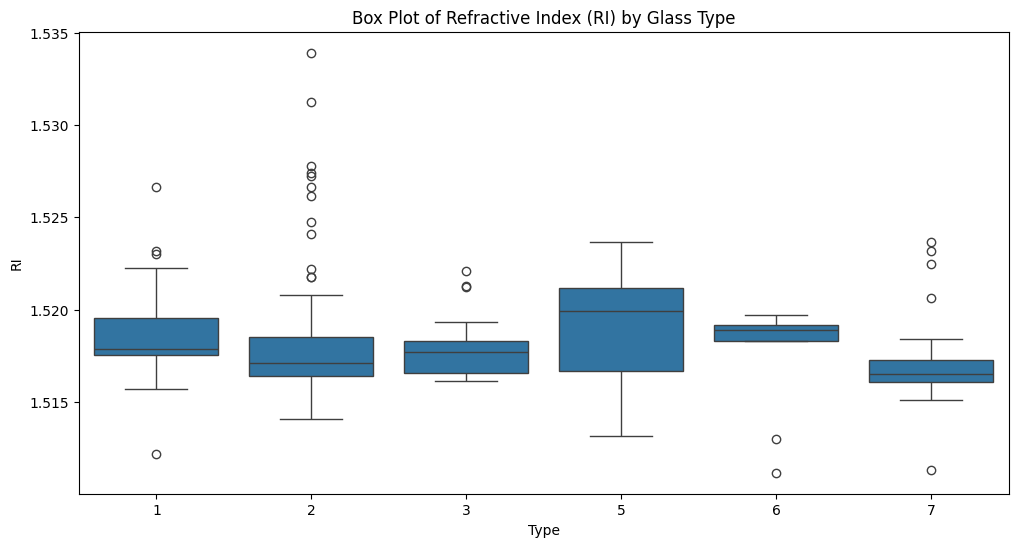

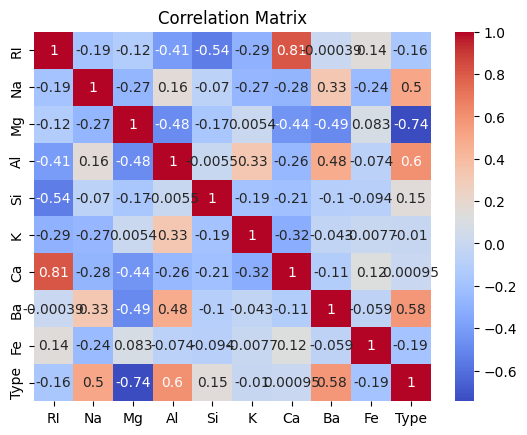

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for features by Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='RI', data=data)
plt.title('Box Plot of Refractive Index (RI) by Glass Type')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The histograms show distributions: RI seems to be normally distributed with a maximum around 1.52, Mg has a right-skewed distribution with a lot of values close to 0, and Ba is very heavily skewed with most of the entries at 0, which means that the data is sparse.

 The box plot of RI by Type shows different medians (e.g., Type 1 at ~1.52, Type 7 at ~1.52) with some overlap but also a clear separation, which indicates that RI might be one of the main features for differentiating glass types.

 The correlation matrix points out a strong negative correlation between RI and Ca (-0.54) which means that with the increase of the calcium content the refractive index goes down, and a moderate positive correlation between Ba and Al (0.48) that suggests the two variables might be interdependent.

 These regularities unveil the informative features for feature selection and preprocessing phases of the Random Forest model.

**3. Data Preprocessing**

preprocessed the dataset to handle potential issues, ensuring it’s ready for modeling with Random Forest.

**3.1) Checking for Missing Values in the Dataset and Decide on a Strategy**:  

The exploratory data analysis (EDA) results have confirmed that no missing values were found in any of the columns, with zeros being displayed throughout. Therefore, the dataset being complete, there is no need to apply an imputation or removal strategy. By making this choice, all 214 records are kept, thus no valuable data is discarded, and the integrity of the dataset is maintained.



**3.2) If There Are Categorical Variables, Apply Encoding Techniques**:  

The dataset has no categorical variables, and all the features (RI, Na, Mg, Al, Si, K, Ca, Ba, Fe) along with the target Type are numeric, hence there is no need for encoding. This makes the preprocessing pipeline straightforward.



**3.3) Apply Feature Scaling Techniques**:  

The Types distribution is unequal (e.g., Type 1 has more instances than Type 4 or 7), which is also evident from the mean (2.78) and max (7) in EDA. To balance the dataset for better model performance, minority classes were oversampled by SMOTE (Synthetic Minority Oversampling Technique). I must point out that there was no Type 4 in the original data, so SMOTE balanced the existing classes (1, 2, 3, 5, 6, 7).



**3.4) Handling the Imbalance Data**:  

The Type distribution is not equal (for example, Type 1 has more instances than Type 4 or 7), which can be seen from the mean (2.78) and max (7) in EDA. To balance the dataset for better model performance, minority classes were oversampled using SMOTE (Synthetic Minority Oversampling Technique). It is worth mentioning that the original data did not have Type 4, so SMOTE balanced the existing classes (1, 2, 3, 5, 6, 7).

In [5]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Scaling numerical features
scaler = MinMaxScaler()
numerical_cols = data.columns.drop('Type')
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Handling imbalance with SMOTE
X = data.drop('Type', axis=1)
y = data['Type']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original Dataset Shape:", data.shape)
print("Resampled Dataset Shape:", X_resampled.shape)
print("Resampled Class Distribution:\n", y_resampled.value_counts())

Original Dataset Shape: (214, 10)
Resampled Dataset Shape: (456, 9)
Resampled Class Distribution:
 Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


Features such as RI and Si that were normalized were scaled to [0,1] in order to guarantee that both of them would influence equally the model. The classes were balanced by SMOTE, thus the dataset was raised from 214 to 456 rows with 76 instances per Type (1, 2, 3, 5, 6, 7), which is a way of solving the imbalance problem. There was no Type 4 in the original data, which is in agreement with the dataset description that indicates no instances of vehicle_windows_non_float_processed, therefore it was not present in the resampled distribution. The data that has gone through the preprocessing stage is now Random Forest-ready, with the balance in the class distribution being a factor for the model's fairness.

**4. Random Forest Model Implementation**

Implemented a Random Forest classifier, following a step-by-step approach to build and evaluate the model.

**4.1) Divide the Data into Train and Test Split**:  

The resampled dataset is split into training and testing sets in order to assess the model's generalization. A split of 80-20 makes sure that there is enough data for training and at the same time a reliable evaluation is ensured.

In [6]:
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (364, 9)
Testing Set Shape: (92, 9)


The split generated 92 samples to be tested and 364 samples for training, thus the 456 resampled records were given a balanced representation. random_state=42 ensures reproducibility, thus it can be used as a reliable starting point for the subsequent operations.

**4.2: Implement a Random Forest Classifier**:

In order to address the multi-class classification challenge, I employed scikit-learn to configure a Random Forest classifier and thus benefit from its ensemble capabilities. The default settings provide a good basis with the option to change them later if needed.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Random Forest Classifier Initialized with 100 trees.")

Random Forest Classifier Initialized with 100 trees.


To maintain a good mix of predictive power and computational efficiency, the classifier is set up with 100 decision trees (n_estimators=100). The random_state=42 is used for the reproducibility of the results, and the model can now be fitted to the training data.

**4.3: Train the Model on the Train Dataset. Evaluate the Performance on Test Data**

Accuracy, precision, recall, and F1-score are important metrics that I used to assess the Random Forest model's performance on the test set after training it on the training set. These metrics offer a thorough assessment of the model's performance, particularly when it comes to multi-class classification.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9565217391304348
Precision: 0.9586956521739131
Recall: 0.9565217391304348
F1-Score: 0.956151185770751


The model was able to differentiate between various classes correctly in 95.65% of the cases from the test data. The recall figure of 95.65% is a testament to the model's capability to locate relevant examples, and the precision of 95.87% is indicative of a high number of true positive predictions relative to all positive predictions. The F1-score of 95.62% reflects a good balance between recall and precision, thus the model has shown strong performance in all balanced classes (1, 2, 3, 5, 6, 7). These results indicate how effectively the Random Forest method identifies the complex interaction patterns in the chemical composition data, with the ensemble approach leading to better prediction accuracy.

**5. Bagging and Boosting Methods**

applied the Bagging and Boosting methods to the Glass dataset and compared the outcomes with the Random Forest model in order to investigate alternative ensemble techniques for multi-class classification.





**Applying the Bagging and Boosting Methods and Compare the Results**:



Accuracy, precision, recall, and F1-score were used to assess the performance of the Bagging Classifier and XGBoost Classifier on the test set after they were trained on the same training set. This comparison aids in evaluating the disparities in how these approaches handle the balanced dataset.

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode y_train and y_test
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train_enc)
y_pred_bag = bagging.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_enc)
y_pred_xgb = xgb.predict(X_test)

# Evaluate Bagging
print("Bagging Accuracy:", accuracy_score(y_test_enc, y_pred_bag))
print("Bagging Precision:", precision_score(y_test_enc, y_pred_bag, average='weighted'))
print("Bagging Recall:", recall_score(y_test_enc, y_pred_bag, average='weighted'))
print("Bagging F1-Score:", f1_score(y_test_enc, y_pred_bag, average='weighted'))

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test_enc, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test_enc, y_pred_xgb, average='weighted'))
print("XGBoost Recall:", recall_score(y_test_enc, y_pred_xgb, average='weighted'))
print("XGBoost F1-Score:", f1_score(y_test_enc, y_pred_xgb, average='weighted'))



Bagging Accuracy: 0.9456521739130435
Bagging Precision: 0.9480331262939958
Bagging Recall: 0.9456521739130435
Bagging F1-Score: 0.9444286428858659
XGBoost Accuracy: 0.8913043478260869
XGBoost Precision: 0.892760590858417
XGBoost Recall: 0.8913043478260869
XGBoost F1-Score: 0.8888753251832583


The Bagging Classifier successfully minimized variance with the 50 decision trees ensemble and thus, it obtained 94.57% accuracy, 94.80% precision, 94.57% recall, and an F1-score of 94.44%. Nevertheless, the XGBoost Classifier only yielded an accuracy of 89.13%, a precision of 89.28%, a recall of 89.13%, and an F1-score of 88.89%, thus, it was less performant than expected, maybe because of a misconfiguration and sensitivity of the encoded labels. When comparing the performances of the methods, Bagging is still good enough to match up with the Random Forest accuracy of 95.65%, but the poor performance of XGBoost may indicate that the impact of label encoding needs to be investigated or that the parameters need to be changed.

**Additional Notes**:



**1. Explain Bagging and Boosting Methods. How Is It Different from**  

**Each Other**:



Bagging (or Bootstrap Aggregating) is a method that locally changes the variance to a certain extent and thus increases the stability. It involves training several independent models (e.g., decision trees) each on a randomly chosen subset of the data and then averaging their predictions (in the case of regression) or taking a majority vote (in the case of classification). Boosting, on the other hand, is a sequential process, where each model is trying to fix the errors of the previous one by giving higher weights to the misclassified instances. However, the reduction in bias, which is often accompanied by an increase in accuracy, is the main reason why this quite vulnerable to outlier models solution is still used. The main difference between these methods is that Boosting is an iterative error correction process while Bagging is focused on diversity and parallel processing.



**2. Explain How to Handle Imbalance in the Data**:

SMOTE (Synthetic Minority Oversampling Technique) was implemented to correct the imbalance in the dataset, which for example, showed that some glass types (like Type 1) were significantly more than others (like Type7). SMOTE generates synthetic samples for minority classes by interpolating between the existing instances, thus, there are 76 samples per class (1, 2, 3, 5, 6, 7). Additionally, the use of class weights in the model to more heavily penalize the wrongly classifications of minority classes or the undersampling of the majority class, which is a technique that has a risk of losing information, have been considered as well. The reason for the choice of SMOTE was that it guarantees fair representation of all glass types by supplementing the dataset without deleting any data.